In [1]:
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data  = np.loadtxt('data.csv', delimiter = ',')

In [3]:
data.shape

(100, 2)

In [4]:
x = data[:,0]
y= data[:,1]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)
x_train.shape

(70,)

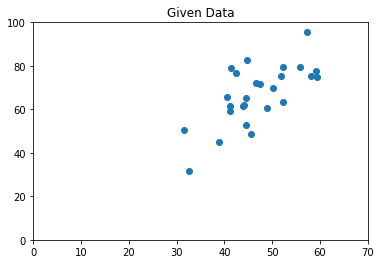

In [17]:
## To see if the data could fit a linear model

plt.scatter(x_test,y_test)
plt.axis([0,70,0,100])
plt.title('Given Data')
plt.show()


In [18]:
def fit(x_train,y_train):
    n = (x_train*y_train).mean()- x_train.mean() * y_train.mean()
    d = (x_train**2).mean() - x_train.mean()**2
    m = n/d
    
    c = y_train.mean()-m*x_train.mean()
    return m,c

In [19]:
def predict(x, m , c):
    y = m*x + c
    return y

In [20]:
def cost_func(x,y, m,c):
    return ((y-(m*x+c))**2).mean()

In [21]:
def coef_det(y_pred,y_test):
    u = ((y_test-y_pred)**2).sum()
    v= ((y_test-y_test.mean())**2).sum()
    return 1-(u/v)


In [22]:
m,c = fit(x_train,y_train)

In [23]:
y_pred = predict(x_test,m ,c)

In [24]:
cd = coef_det(y_pred,y_test)

In [25]:
func = cost_func(x_train,y_train,m ,c )

In [26]:
print('M,C : ',m,c)
print('Score of test data:',cd)
print('Cost function:',func)

M,C :  1.138329275840028 17.127720019113035
Score of test data: 0.6198814800951322
Cost function: 95.21133636572667


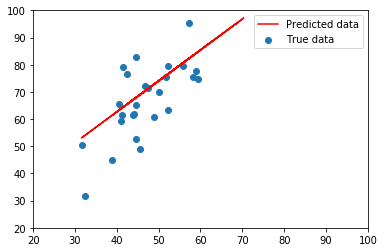

In [30]:
#Checking Predicted data against true data
plt.scatter(x_test,y_test,label='True data')
plt.plot(x_test,y_pred,c="red",label="Predicted data")
plt.axis([20,100,20,100])
plt.legend()
plt.show()